In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/unbalaced_20_80_dataset.csv",index_col=0,low_memory=False)


/root/pydev/py36-venv/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.shape

(7616509, 84)

In [4]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [5]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [16]:
print(train.shape)
print(X.shape)
print(Y.shape)

(7616509, 84)
(7616509, 83)
(7616509,)


In [17]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5103061, 83)
(5103061,)
(2513448, 83)
(2513448,)


In [19]:
%%time
model=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: user 6h 51min 8s, sys: 10.9 s, total: 6h 51min 18s
Wall time: 1h 7min 5s


In [20]:
print(model)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=25, n_neighbors=6, p=2,
           weights='uniform')


In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9994119631677282
f1-acore: 0.9982691749187286
confusion matrix:
 [[2085745     619]
 [    859  426225]]
Precision: 0.9985498214804472
Recall_score: 0.9979886860664413
Misclassified : 1478


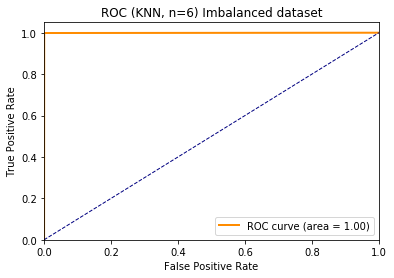

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (KNN, n=6) Imbalanced dataset')
plt.legend(loc="lower right")
plt.show()
